<a href="https://colab.research.google.com/github/Sirabhop/Kaggle_Challenges/blob/master/Challenge_2_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('/content/drive/My Drive/My Project/Kaggle/Challenge#2_House Price')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###**1. Data Exploration**

"*Keep calm and work smart! (Marcelino, 2017)*"

####**Top-down Approach**

First, in my opinions, sale price would depend on
1. **Properties**, such as area, facilities,...
2. **Location**, land curve, road connection,...
3. **Artistry**, emotional attachment of the house.


In [4]:
len(df.columns)

81

If we categorize 80 features (dependent variable is excluded) it would be like this

In [82]:
#1
Properties = ['MSSubClass', 'LotArea', 'LotConfig', 'BldgType',
              'HouseStyle', 'OverallCond', 'RoofStyle', 'MasVnrArea', 'ExterCond',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'] 
#2
Facilities = ['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
              'MiscVal']
#3
Basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
            'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
#4
Appliance = ['Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
             'Functional', 'Fireplaces', 'FireplaceQu']
#5
Room = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'KitchenQual', 'TotRmsAbvGrd']
#6
Garage = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
          'GarageQual', 'GarageCond']
#7
Material = ['RoofMatl', 'Exterior1st', 'Exterior2nd', 'OverallQual', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation']
#8
Location = ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope',
            'Neighborhood', 'Condition1', 'Condition2', ]
#9
History = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']
#10
Sales = ['SaleType', 'SaleCondition']

total_category = ['roperties', 'Facilities', 'Basement', 'Appliance', 'Room', 'Garage', 'Material', 'Location', 'History', 'Sales']

In [91]:
col_dict = {#1
'Properties' : ['MSSubClass', 'LotArea', 'LotConfig', 'BldgType',
              'HouseStyle', 'OverallCond', 'RoofStyle', 'MasVnrArea', 'ExterCond',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'] 
#2
,'Facilities' : ['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
              'MiscVal'],
#3
'Basement' : ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
            'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'],
#4
'Appliance' : ['Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
             'Functional', 'Fireplaces', 'FireplaceQu'],
#5
'Room' : ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'KitchenQual', 'TotRmsAbvGrd'],
#6
'Garage' : ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
          'GarageQual', 'GarageCond'],
#7
'Material' : ['RoofMatl', 'Exterior1st', 'Exterior2nd', 'OverallQual', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation'],
#8
'Location' : ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope',
            'Neighborhood', 'Condition1', 'Condition2', ],
#9
'History' : ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'],
#10
'Sales' : ['SaleType', 'SaleCondition']}

In [93]:
col_dict['Appliance']

['Utilities',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'Functional',
 'Fireplaces',
 'FireplaceQu']

####**Bottom-up Approach**

In [ ]:
def get_heatmap(data, list_col, y):
  corrmat = data[list_col+[y]].corr()
  sns.heatmap(corrmat, square = True)

['MSSubClass', 'LotArea', 'LotConfig', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'MasVnrArea', 'ExterCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']


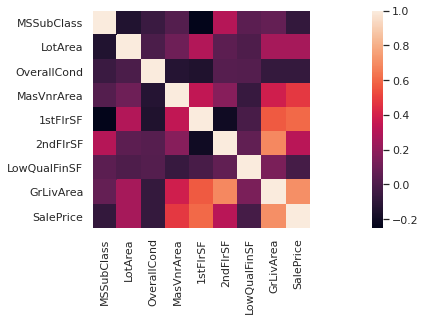

['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']


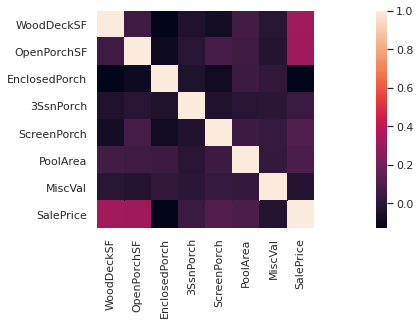

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']


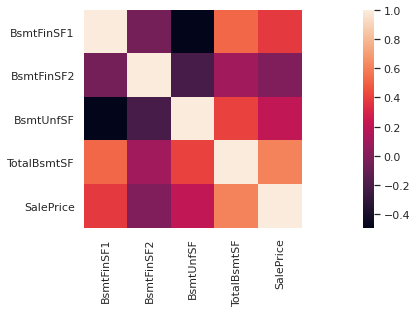

['Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'Fireplaces', 'FireplaceQu']


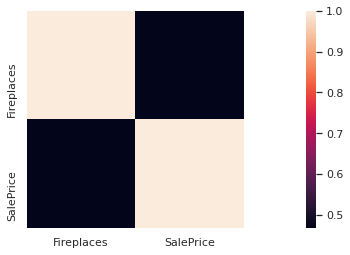

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd']


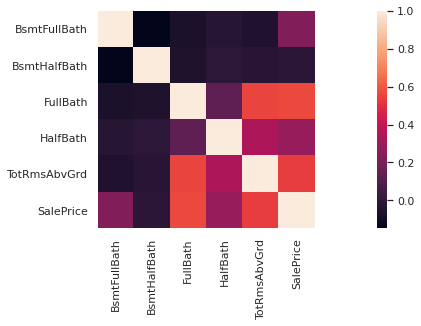

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


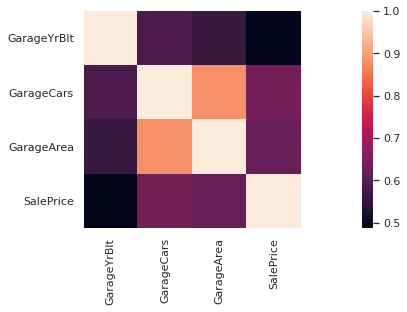

['RoofMatl', 'Exterior1st', 'Exterior2nd', 'OverallQual', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation']


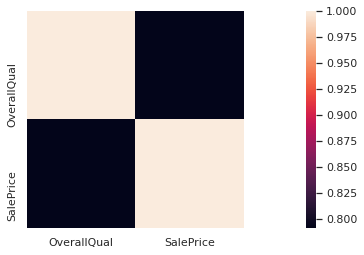

['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']


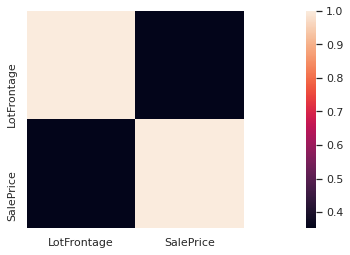

['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']


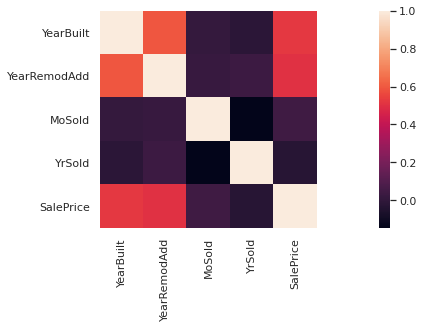

['SaleType', 'SaleCondition']


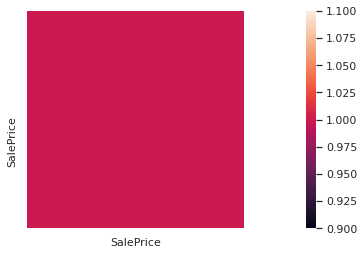

In [ ]:
for i in total_category:
  print(i)
  get_heatmap(df, i, 'SalePrice')
  plt.show()

####**Top meet bottom**

In [132]:
corr = df.corr().SalePrice

In [136]:
corr = pd.DataFrame(corr.reset_index())

In [143]:
corr['group'] = None

In [ ]:
for x in total_category: #group name
  for column in col_dict[x]: #column name
    for i in range(len(corr)): #column name x index
      if column == corr.iloc[i, 0]:
        corr.iloc[i, 2] = x 

In [156]:
corr.groupby('group').count()

,index,SalePrice
group,,
Appliance,1,1
Basement,4,4
Facilities,7,7
Garage,3,3
History,4,4
Location,1,1
Material,1,1
Properties,8,8
Room,5,5
